# Exploratory analysis of the sample data
Initialize Weights&Biases, retrieve the latest sample csv file and perform standard data analysis including pandas profiling. 

In [121]:
import wandb
import pandas as pd
import pandas_profiling
import seaborn as sns
sns.set()

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)

wandb: wandb version 0.12.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [122]:
# get latest version of the sample data and generate standard reports
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

In [123]:
# Standard EDA checks incl. Pandas Profiling
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877.000000,20000.000000,20000.000000
mean,1.892380e+07,6.746034e+07,40.728455,-73.952125,153.269050,6.992100,23.274100,1.377446,6.955450,112.901200
std,1.101223e+07,7.857936e+07,0.054755,0.046559,243.325609,21.645449,44.927793,1.683006,32.433831,131.762226
min,2.539000e+03,2.571000e+03,40.508730,-74.239140,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.393540e+06,7.853718e+06,40.689420,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952117e+07,3.111431e+07,40.722730,-73.955640,105.000000,2.000000,5.000000,0.720000,1.000000,44.000000
75%,2.912936e+07,1.068426e+08,40.762990,-73.936380,175.000000,5.000000,23.000000,2.010000,2.000000,229.000000
max,3.648561e+07,2.742733e+08,40.913060,-73.717950,10000.000000,1250.000000,607.000000,27.950000,327.000000,365.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [125]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Perform data cleaning:
1. drop the outliers in the price column by applying a range
2. correct the data type for the last_review column

In [126]:
# Drop outliers price
min_price = 10
max_price = 350

In [127]:
df.loc[df['price'].between(min_price, max_price)==False]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
82,1861281,Carol,9709464,Jessica,Manhattan,East Village,40.72898,-73.98051,Private room,1700,1,0,NaN,NaN,1,0
94,29424522,1-bed/ba PR condo Wyn. Midtown 45 Thanksgiving,30616847,Martha,Manhattan,Midtown,40.75322,-73.97353,Private room,500,3,0,NaN,NaN,1,365
112,24618542,"New Condo 2 bedrms /1,5bath elevator & balcony",55149412,Ha,Manhattan,Chinatown,40.71409,-73.99434,Entire home/apt,400,1,2,2018-10-07,0.20,4,191
136,9919042,East Village Two Bedroom,50997070,Panayiota,Manhattan,East Village,40.72964,-73.98095,Entire home/apt,380,1,0,NaN,NaN,1,0
147,9920363,Convenient Ridgewood Brownstone,50997424,Mark,Queens,Ridgewood,40.70422,-73.89840,Entire home/apt,375,4,5,2019-05-17,0.13,2,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19934,31909623,Wyndham Midtown 45 New York City 1 BR Apt w/View,96086378,Ashley,Manhattan,Midtown,40.75342,-73.97135,Entire home/apt,699,1,1,2019-04-23,0.39,2,333
19943,28153873,Idyllic West Village Full 2 bedroom,3571431,Julianne,Manhattan,West Village,40.73281,-74.00688,Entire home/apt,375,4,5,2019-05-26,0.55,2,289
19968,36329299,Central Park European 2 Bedroom 2 bath duplex,6524294,Natascha,Manhattan,Upper East Side,40.78439,-73.95762,Entire home/apt,400,5,0,NaN,NaN,2,363
19981,34483432,Manhattan Accommodation Across Central Park,260425153,Park Lane,Manhattan,Midtown,40.76427,-73.97618,Private room,375,1,1,2019-06-30,1.00,14,349


In [128]:
df['price'].between(min_price, max_price).all()

False

In [129]:
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

In [130]:
df['price'].between(min_price, max_price).all()

True

In [131]:
# Convert last_review column to datetime
df['last_review'] = pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

# Perform further analysis - check columns with missing values
1. last_review
2. reviews_per_month
3. name
4. host_name

In [132]:
# identify rows in last_review with missing values 
df[df['last_review'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
10,35468220,Forest Hills Charming 1 bdrm apartment!,7599704,Sasha,Queens,Forest Hills,40.72085,-73.84088,Entire home/apt,75,1,0,NaT,NaN,1,7
15,7126110,Sunny East Village Bedroom,37325763,Noah,Manhattan,East Village,40.72393,-73.98271,Private room,100,1,0,NaT,NaN,1,0
16,35005489,Exquisite Park Slope Paradise,229604812,Jake,Brooklyn,Windsor Terrace,40.65863,-73.98495,Entire home/apt,300,3,0,NaT,NaN,1,335
27,22064197,Upper West Side Central Park apartment,20153029,Tal,Manhattan,Upper West Side,40.77244,-73.98043,Entire home/apt,190,7,0,NaT,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19972,32022820,Small Artist Tenement APT in NOLITA/ Little Italy,866089,Launa,Manhattan,Little Italy,40.71910,-73.99513,Entire home/apt,250,3,0,NaT,NaN,3,0
19982,8205572,Cool Chill Space In a 5BR 2.5 bath,10387090,Luis Enrique,Brooklyn,Bushwick,40.68358,-73.90884,Private room,36,20,0,NaT,NaN,5,346
19984,7644505,Contemporary Brooklyn Town House,29999716,Scott,Brooklyn,South Slope,40.66393,-73.98728,Entire home/apt,300,7,0,NaT,NaN,1,0
19988,20811696,A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE,76104209,Rated,Manhattan,Upper East Side,40.78015,-73.95852,Entire home/apt,225,30,0,NaT,NaN,33,346


Most probably just no reviews were taken place or the review feature was introduced at a later time 
-> handling has tbd, if the column is needed for model training
-> since most probably the data is not available in production as well, this has to be considered in the inference step

In [133]:
# identify rows in reviews_per_month with missing values 
df[df['reviews_per_month'].isnull()]
# -> no last_review date, most probably so far no review...
# set the values equal to 0 - logically the correct value since there was just no review so far 
df['reviews_per_month'].fillna(0, inplace=True)

# double check
df[df['reviews_per_month'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [134]:
# identify the missing values in the name column
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3872,22275821,NaN,49662398,Kathleen,Brooklyn,Bushwick,40.69546,-73.92741,Entire home/apt,110,4,5,2018-08-13,0.27,1,0
4561,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaT,0.00,1,0
5588,14135050,NaN,85288337,Jeff,Brooklyn,Bedford-Stuyvesant,40.69421,-73.93234,Private room,70,3,0,NaT,0.00,1,0
7259,9885866,NaN,37306329,Juliette,Manhattan,Chinatown,40.71632,-73.99328,Private room,67,4,0,NaT,0.00,1,0
9692,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
11666,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaT,0.00,1,0
14978,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaT,0.00,2,0


In [135]:
# is the id used elsewhere in order to get the name
df['id'].is_unique

True

In [136]:
# id is unique, therefore name can not be copied from items with the same id 
# -> either drop NaNrows or set an empty string -> handling has tbd 
# At the moment set the missing values to an empty string
df['name'].fillna("", inplace=True)
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [137]:
# identify the missing values in the host_name column
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2180,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5268,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaT,0.00,1,0
7059,12113879,"Sunny, Large West Village 1 BR Near Everything",5300585,NaN,Manhattan,Chelsea,40.73949,-73.99801,Entire home/apt,220,4,81,2019-07-02,2.11,1,217
7420,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
11359,23660605,Private Bedroom w/ Balcony view of Central Park,177146433,NaN,Manhattan,East Harlem,40.79766,-73.94824,Private room,139,1,6,2018-08-12,0.46,1,0
17161,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
19452,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0
19906,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,NaN,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,120,1,109,2019-01-01,5.97,3,0


In [138]:
# is there a chance that the host_id is used elsewhere in order to get the host_name
df['host_id'].is_unique

False

In [139]:
# get all host_ids of the NaN rows for further checks
host_ids = list(df[df['host_name'].isnull()]['host_id'])
host_ids

[7779204, 5162530, 5300585, 33134899, 177146433, 32722063, 39608626, 159156636]

In [140]:
# find a possible match to copy host_name from other row with same host_id
for host_id in host_ids:
    # check if the host_id is used in another record 
    if (df.loc[df['host_id'] == host_id].shape[0] > 1): 
        print(f"FOUND another record for host_id: {host_id}")


In [141]:
# no other match found -> again, either drop NaNrows or set an empty string 
# current choice is the empty string
df['host_name'].fillna("", inplace=True)
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


# Understand data correlations

In [142]:
# check correlations between neighbourhood_group,room_type,price
df_grp = df[['neighbourhood_group','room_type', 'price']]
df_grp = df_grp.groupby(['neighbourhood_group','room_type'],as_index=False).mean()
df_grp

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,113.682759
1,Bronx,Private room,63.500000
2,Bronx,Shared room,46.962963
3,Brooklyn,Entire home/apt,151.030900
4,Brooklyn,Private room,70.548792
5,Brooklyn,Shared room,48.940789
6,Manhattan,Entire home/apt,186.170467
7,Manhattan,Private room,99.108613
8,Manhattan,Shared room,76.405556
9,Queens,Entire home/apt,132.074246


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

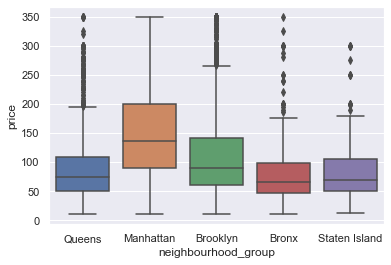

In [143]:
sns.boxplot(x="neighbourhood_group", y="price", data=df)

<AxesSubplot:xlabel='room_type', ylabel='price'>

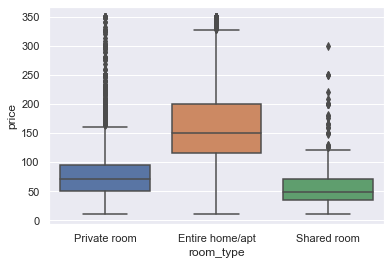

In [144]:
sns.boxplot(x="room_type", y="price", data=df)

In [145]:
df_pivot = df_grp.pivot(index='neighbourhood_group',columns='room_type')
df_pivot

price                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                    113.682759    63.500000   46.962963
Brooklyn                 151.030900    70.548792   48.940789
Manhattan                186.170467    99.108613   76.405556
Queens                   132.074246    65.741750   51.280000
Staten Island            122.544118    61.977011   55.500000

<AxesSubplot:xlabel='None-room_type', ylabel='neighbourhood_group'>

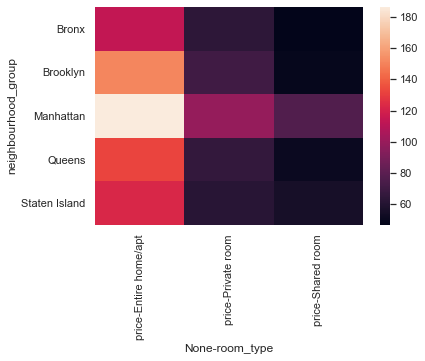

In [146]:
sns.heatmap(df_pivot)

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

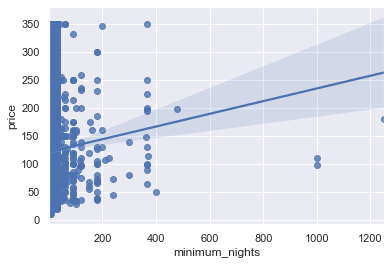

In [147]:
# check correlation 'minimum_nights', ylabel='price'
sns.regplot(x="minimum_nights",y="price", data=df)

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

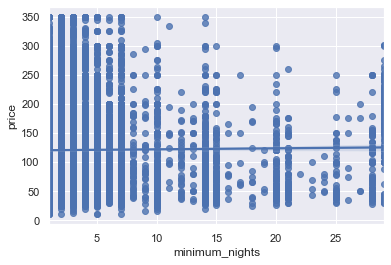

In [148]:
# outliers - reduce min_nights range
min_nights = 30
idx = df['minimum_nights']<min_nights
df_min_nights = df[idx].copy()
sns.regplot(x="minimum_nights",y="price", data=df_min_nights)

In [149]:
df_grp2 = df_min_nights[['minimum_nights','room_type','price']]
df_grp2 = df_grp2.groupby(['minimum_nights','room_type'],as_index=False).mean()
df_grp2

df_pivot2 = df_grp2.pivot(index='room_type',columns='minimum_nights')
df_pivot2

price                                                  \
minimum_nights           1           2           3           4           5    
room_type                                                                     
Entire home/apt  160.667093  169.512236  167.883616  167.448408  159.746894   
Private room      82.567030   81.248004   84.860917   80.352423   76.956067   
Shared room       68.345133   54.594937   73.827586   66.642857   43.388889   

                                                                             \
minimum_nights           6           7           8           9           10   
room_type                                                                     
Entire home/apt  163.023256  162.166667  141.606061  146.850000  160.725000   
Private room      70.946903   70.460526   71.631579   68.153846   69.282609   
Shared room             NaN   55.200000         NaN   28.000000   48.166667   

                 ...                                                        \
minimum_nights   ...          20          21    22    23    24          25   
room_type        ...                                                         
Entire home/apt  ...  133.021277  122.761905   NaN   NaN  75.0  143.500000   
Private room     ...   60.372549   64.806452  80.0  66.5  64.5   66.526316   
Shared room      ...   26.000000         NaN   NaN   NaN   NaN   30.000000   

                                                                 
minimum_nights           26          27          28          29  
room_type                                                        
Entire home/apt  138.333333  141.666667  151.413793  182.365217  
Private room      55.000000   50.000000   66.970588   38.250000  
Shared room             NaN         NaN         NaN         NaN  

[3 rows x 29 columns]

In [150]:
# Compare / check cleaned_data
local_path_clean = wandb.use_artifact("cleaned_data.csv:latest").file()
df_clean = pd.read_csv(local_path_clean)
df_clean[df_clean['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [151]:
profile = pandas_profiling.ProfileReport(df_clean)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [152]:
run.finish()